In [ ]:
import numpy as np
from numpy import random
import math
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
popSize = 10
featureSize = 2
maxIteration = 10

w = 0.5
c1 = 1
c2 = 1
r1 = round(np.random.rand(), 4)
r2 = round(np.random.rand(), 4)

x1_min = -1.5
x1_max = 4
x2_min = -3
x2_max = 4

k = round(np.random.rand(), 1)
v1_min = k * (x1_max - x1_min) / 2 * -1
v1_max = k * (x1_max - x1_min) / 2
v2_min = k * (x2_max - x2_min) / 2 * -1
v2_max = k * (x2_max - x2_min) / 2

x_min = [x1_min, x2_min]
x_max = [x1_max, x2_max]
v_min = [v1_min, v2_min]
v_max = [v1_max, v2_max]

In [ ]:
def hitungFitness(x1, x2):
  fitness = math.sin(x1 + x2) + (x1-x2)**2 - 1.5*x1  + 2.5*x2 + 1 #Mc Cormick function
  return fitness

def initiateKecepatan():
  kecepatan = []
  for i in range(popSize):
    temp = []
    for j in range(featureSize):
      temp.append(0)
    kecepatan.append(temp)
  return kecepatan

def initiatePosisi(): 
  posisi = []
  for i in range(popSize):
    #x = xmin + rand[0,1]*(xmax-xmin)
    x1 = x1_min + round(np.random.rand(), 5) * (x1_max - x1_min)
    x2 = x2_min + round(np.random.rand(), 5) * (x2_max - x2_min)
    fitness = hitungFitness(x1, x2)
    posisi.append([x1, x2, fitness])
  return posisi

def initiatePbest(posisi):
  pbest = posisi[:]
  return pbest

def initiateGbest(pbest):
  gbest = [0,0,0]
  for i in pbest:
    gbest = i[:] if i[2] > gbest[2] else gbest
  return gbest

def updateKecepatan(kecepatan, posisi, pbest, gbest):
  for i in range(popSize):
    for j in range(featureSize):
      # v = w.v0 + c1.r1.(pbest - x) + c2.r2.(gbest - x)
      kecepatan[i][j] = w*kecepatan[i][j] + c1*r1*(pbest[i][j]-posisi[i][j]) + c2*r2*(gbest[j]-posisi[i][j])
      kecepatan[i][j] = np.clip(kecepatan[i][j], v_min[j], v_max[j])
  return kecepatan

def updatePosisi(posisi, kecepatan):
  for i in range(popSize):
    for j in range(featureSize):
      posisi[i][j] = posisi[i][j] + kecepatan[i][j]
      posisi[i][j] = np.clip(posisi[i][j], x_min[j], x_max[j])
    posisi[i][2] = hitungFitness(posisi[i][0], posisi[i][1])
  return posisi

def updatePbest(pbest, posisi):
  for i in range(popSize):
    pbest[i] = posisi[i][:] if posisi[i][2] > pbest[i][2] else pbest[i][:]
  return pbest

def updateGbest(pbest, gbest):
  for i in pbest:
    gbest = i[:] if i[2] > gbest[2] else gbest
  return gbest

def cetakOutput(i):
  print('ITERASI : ' + str(i))

  print('kecepatan:')
  print(pd.DataFrame(kecepatan, index=range(1,11)))
  print()
    
  print('posisi:')
  print(pd.DataFrame(posisi, index=range(1,11)))
  print()
    
  print('pbest:')
  print(pd.DataFrame(pbest, index=range(1,11)))
  print()
    
  print('gbest:')
  print(np.array(gbest))
  print()

In [ ]:
def ShowGraph(data):
  plt.style.use('ggplot')
  plt.subplots(figsize=(12, 6))    
  plt.title('Hasil Tes Konvergen Rata-Rata Fitness')
  plt.xlabel('Total Iterasi')
  plt.ylabel('Rata-Rata Fitness')

  for i in range(len(data)):
    plt.plot(data, label='Trial ke '+str(i))

  plt.legend(loc='lower right')
  plt.show()

ITERASI : 0
kecepatan:
    0  1
1   0  0
2   0  0
3   0  0
4   0  0
5   0  0
6   0  0
7   0  0
8   0  0
9   0  0
10  0  0

posisi:
           0        1          2
1  -0.943565 -0.45039   0.548190
2   1.998330  1.21687   1.581819
3   3.851280  2.49227   3.360991
4   3.509290  0.81941   4.092754
5   0.289535  2.16719  10.141831
6   1.039955  0.29252   1.701762
7   3.347150  0.11178   6.414306
8   0.368020 -1.40603  -0.781247
9   1.789385  1.34980   1.886065
10  3.571660  1.05055   3.628944

pbest:
           0        1          2
1  -0.943565 -0.45039   0.548190
2   1.998330  1.21687   1.581819
3   3.851280  2.49227   3.360991
4   3.509290  0.81941   4.092754
5   0.289535  2.16719  10.141831
6   1.039955  0.29252   1.701762
7   3.347150  0.11178   6.414306
8   0.368020 -1.40603  -0.781247
9   1.789385  1.34980   1.886065
10  3.571660  1.05055   3.628944

gbest:
[ 0.289535    2.16719    10.14183131]

ITERASI : 1
kecepatan:
           0         1
1   0.768221  1.630752
2  -1.064579  0.592

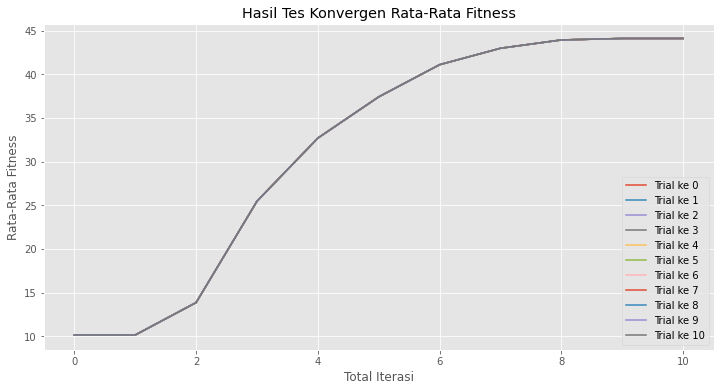

In [ ]:
kecepatan = posisi = pbest = gbest = ''
gbestAllIteration = []

for i in range(maxIteration+1):
  if i == 0:
    kecepatan = initiateKecepatan()[:]
    posisi = initiatePosisi()[:]
    pbest = initiatePbest(posisi)[:]
    gbest = initiateGbest(pbest)[:]
    cetakOutput(i)

  else:
    kecepatan = updateKecepatan(kecepatan, posisi, pbest, gbest)[:]
    posisi = updatePosisi(posisi, kecepatan)[:]
    pbest = updatePbest(pbest, posisi)[:]
    gbest = updateGbest(pbest, gbest)[:]
    cetakOutput(i)
  
  gbestAllIteration.append(gbest[2])

ShowGraph(gbestAllIteration)